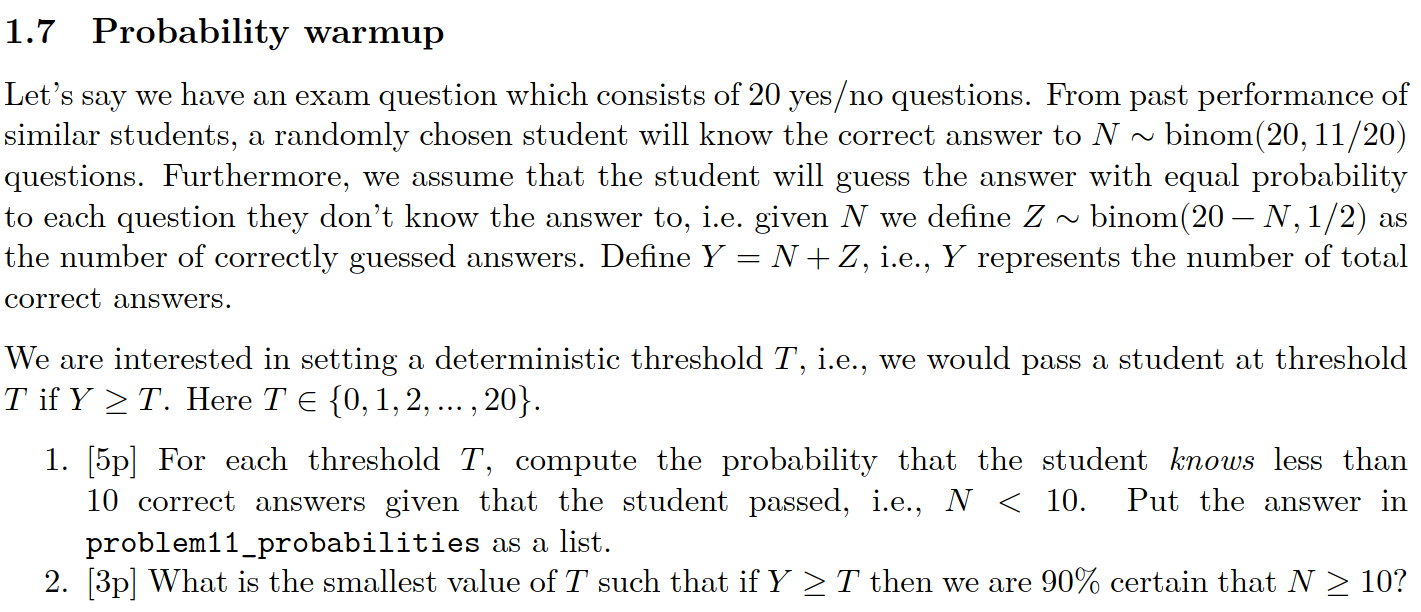

In [ ]:
from scipy.special import binom as binomial


def p_N(k):
    p = 11/20
    return binomial(20,k)*((1-p)**(20-k))*((p)**k)


def guessed(N, Z):
    #probability of guessing correctly
    p = 1 / 2
    # print("Questions left to guess: ",10-N)
    # returns the prob of guessing Z amount of questions 10-N correctly
    return binomial(20 - N, Z) * (p ** Z) * ((1 - p) ** (20 - N - Z))

def Y_eq_T(T, N):
    total_prob = 0
    for Z in range(21 - N):
        Y = N + Z
        if Y >= T:
            p_Z = guessed(N,Z) # Probability of guessing Z correct answers
            
            total_prob += p_Z
    # print("Prob:",total_prob)
    return total_prob
    
def N_less_than_five_Y_eq_T(T):
    total_prob_Y_eq_T = 0
    less_than_five_and_Y_eq_T = 0

    for N in range(21):
        # P(Y >= T | N) * P(N)
        prob_Y_eq_T = Y_eq_T(T, N)
        prob_N  = p_N(N) 
            
        # Total probability P(Y >= T)
        total_prob_Y_eq_T += prob_Y_eq_T * prob_N

        if N < 10:
            less_than_five_and_Y_eq_T += prob_Y_eq_T * prob_N

 
    # P(N < 5 | Y >= T) = P(N<5 and Y>=T)/P(Y>=T)​ 
    return less_than_five_and_Y_eq_T / total_prob_Y_eq_T


test = [N_less_than_five_Y_eq_T(T) for T in range(21)]

#WRONG

[0.24928935982841177,
 0.24928935982832875,
 0.24928935982261038,
 0.2492893596354927,
 0.24928935576839326,
 0.24928929915834958,
 0.2492886751893024,
 0.24928330207958446,
 0.24924628523366013,
 0.24903902630299046,
 0.2480856990043143,
 0.24460820014975926,
 0.2349439695781523,
 0.21475641513175908,
 0.18267139196620988,
 0.1427252244707204,
 0.10227042692681906,
 0.06762809950564576,
 0.041664724391227426,
 0.024151134340423375,
 0.013287462679601604]

In [11]:
import numpy as np

def problem2_LCG(size=None, seed = 0):
    """
    A linear congruential generator that generates pseudo random numbers␣
    ↪according to size.
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
    list_of_psuedo_numbers =  np.zeros(size)


    a = 16807
    M = 2**31 - 1
    c = 0

    X = seed

    for i in range(size):
        X = (a*X + c) % M
        list_of_psuedo_numbers[i] = X
    
    return list_of_psuedo_numbers


x = problem2_LCG(size=5, seed=2)

x

array([3.36140000e+04, 5.64950498e+08, 1.09781650e+09, 1.96988732e+09,
       1.40734213e+08])

In [12]:
def problem2_uniform(generator=None, period = 1, size=None, seed=0):
    """
    Takes a generator and produces samples from the uniform [0,1] distribution␣
    ↪according
    to size.
    Parameters
    -------------
    generator : a function of type generator(size,seed) and produces the same␣
    ↪result as problem2_LCG, i.e. pseudo random numbers in the range {0,1,...
    ↪,period-1}
    period : the period of the generator
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    Returns
    --------------ut : a list of the uniform pseudo random numbers
    """
    list_of_psuedo_numbers = np.zeros(size)
    random_numbers = generator(size,seed) 

    for i in range(size):
        list_of_psuedo_numbers[i] = random_numbers[i]/(max(random_numbers) - 1)

    
    return list_of_psuedo_numbers

x = problem2_uniform(generator=problem2_LCG, size=10, seed=5)

x



array([5.02962826e-05, 8.45329622e-01, 1.00000000e+00, 3.76915976e-01,
       8.53230697e-01, 1.21841503e-01, 3.02332951e-01, 5.06825318e-01,
       5.09599574e-01, 8.65605971e-01])

In [13]:
import math

def f(x):
    return math.pi / 2 *(math.sin(2*math.pi*x))

def problem2_accept_reject(uniformGenerator=None, size=None, seed=0):
    """
    Takes a generator that produces uniform pseudo random [0,1] numbers
    and produces samples from (pi/2)*abs(sin(x*2*pi)) using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution
    Parameters
    -------------
    generator : a function of the type generator(size,seed) that produces␣
    ↪uniform pseudo random
    numbers from [0,1]
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    Returns
    --------------
    out : a list of the pseudo random numbers with the specified distribution
    """
    M = math.pi / 2
    accepted_samples = np.zeros(size)
    i = 0

    while i < size:     
        print(i)
        U = uniformGenerator(size=size, seed=seed)[0]
        print(U)
        acceptance_ratio = f(U)/M

        if uniformGenerator(size=size, seed=seed+1)[0] <= acceptance_ratio:
            accepted_samples[i] = U
        i += 1
        seed +=1
    return accepted_samples

uniform_sampler = lambda size,seed: problem2_uniform(generator=problem2_LCG,size=size, seed=seed)

x = problem2_accept_reject(uniformGenerator=uniform_sampler,size=20,seed=1)
print(x)

0
8.373198616693185e-06
1
1.706392022733544e-05
2
2.9200012570234484e-05
3
3.574350724823942e-05
4
4.2650030835919e-05
5
4.76350101505789e-05
6
5.949901829628924e-05
7
8.329541336113343e-05
8
7.256846492099617e-05
9
9.372664128914081e-05
10
0.00010005357813176972
11
9.666319776259618e-05
12
0.00010323694800846521
13
0.00011708718250412896
14
0.00011840093322694587
15
0.00013111056416159728
16
0.00014639225412611153
17
0.00014639225412194453
18
0.00016401479698803514
19
0.00016636057200715507
[8.37319862e-06 1.70639202e-05 2.92000126e-05 3.57435072e-05
 4.26500308e-05 4.76350102e-05 5.94990183e-05 8.32954134e-05
 7.25684649e-05 9.37266413e-05 1.00053578e-04 9.66631978e-05
 1.03236948e-04 1.17087183e-04 1.18400933e-04 1.31110564e-04
 1.46392254e-04 1.46392254e-04 1.64014797e-04 1.66360572e-04]


In [15]:
import pandas as pd
import numpy as np

def prob_of_spam_and_word(s):
    tot_amount_of_spam_given_word=0
    tuples_of_spam = []
    for k,i in s:
        if i == 1:
            tuples_of_spam.append((k,i))
    for k,i in tuples_of_spam:
        if 'prize' in k or 'free' in k:
            tot_amount_of_spam_given_word += 1
    print(tuples_of_spam)
    return tot_amount_of_spam_given_word/len(tuples_of_spam)

def prob_of_word(s):
    tot_amount_of_word=0
    amount_of_texts = len(s)
    for k,i in s:
        if 'prize' in k or 'free' in k:
            tot_amount_of_word += 1
    
    return tot_amount_of_word/amount_of_texts


def prob_of_spam(s):
    amount_of_texts = len(s)
    print(amount_of_texts)
    tot_amount_of_spam=0
    for k,i in s:
        if i == 1:
            tot_amount_of_spam +=1
    print(tot_amount_of_spam)
    return tot_amount_of_spam/amount_of_texts

def tot_instances_of_spam(s):
    tot_instances = []

    for k,i in s: 
        if ('prize' in k or 'free' in k) and i == 1:
            tot_instances.append((k,i))

    return tot_instances

data = pd.read_csv("data/spam.csv")

X = data["v2"].str.lower()
Y = data["v1"].map({"ham": 0, "spam": 1})
sms_tuples = list(zip(X, Y))

# P_AB = prob_of_spam_and_word(sms_tuples)
# # print(P_AB)
# P_B = prob_of_word(sms_tuples)

# P_A = prob_of_spam(sms_tuples)

# print(P_A)
# print(P_B)
# total_prob = (P_AB*P_A)/P_B

tot_instances_of_free_or_prize = tot_instances_of_spam(sms_tuples)

print("Tot instances", tot_instances_of_free_or_prize)
def hoeffdings_range_based(X, alpha):

    log_term = np.log(2 / (1 - alpha))
    range_term = (np.max(X) - np.min(X)) ** 2
    denominator = 2 * len(X)

    epsilon = np.sqrt((log_term * range_term) / denominator)
    sample_mean = np.mean(X)
    
    return sample_mean - epsilon, sample_mean + epsilon

def calculate_probability_with_confidence(sms_tuples, alpha=0.9):
    # Filter the subset where 'free' or 'prize' is in the SMS
    filtered_tuples = [(k, i) for k, i in sms_tuples if 'free' in k or 'prize' in k]
    # Calculate \hat{P}
    spam_counts = sum(1 for _, i in filtered_tuples if i == 1)
    total_counts = len(filtered_tuples)
    p_hat = spam_counts / total_counts if total_counts > 0 else 0
    
    # Calculate Hoeffding bounds
    hoeffding_lower, hoeffding_upper = hoeffdings_range_based([i for _, i in filtered_tuples], alpha)
    
    return p_hat, (hoeffding_lower, hoeffding_upper)

# Use the function

p_hat, confidence_interval = calculate_probability_with_confidence(sms_tuples, alpha=0.9)

print(confidence_interval)





FileNotFoundError: [Errno 2] No such file or directory: 'data/spam.csv'

In [ ]:
data = pd.read_csv("data/flights.csv")

unique_cities = data["from"].unique()
print(unique_cities)

unique_userCodes = data["userCode"].unique()


number_of_cities = len(unique_cities)
number_of_userCodes = len(unique_userCodes)
number_of_observations = len(data["travelCode"])


['Recife (PE)' 'Florianopolis (SC)' 'Brasilia (DF)' 'Aracaju (SE)'
 'Salvador (BH)' 'Campo Grande (MS)' 'Sao Paulo (SP)' 'Natal (RN)'
 'Rio de Janeiro (RJ)']


In [ ]:
def makeFreqDict(myDataList):
    '''Make a frequency mapping out of a list of data.
    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.
    ↪'''
    freqDict = {} # start with an empty dictionary
    for res in myDataList:
        if res in freqDict: # the data value already exists as a key
            freqDict[res] = freqDict[res] + 1 # add 1 to the count using␣
        #↪sage integers
        else: # the data value does not exist as a key value
            freqDict[res] = 1 # add a new key-value pair for this new data␣
        #↪value, frequency 1
    return freqDict # return the dictionary created

In [ ]:
cities = unique_cities
unique_cities = sorted(set(cities)) # The unique cities
n_cities = len(unique_cities) # The number of unique citites
# print(n_cities)

# Count the different transitions
transitions = list(zip(data["from"],data["to"])) # A list containing tuples ex: ('Aracaju (SE)','Rio de␣
#↪Janeiro (RJ)') of all transitions in the text
transition_counts = makeFreqDict(transitions) # A dictionary that counts the number of each␣
#↪transition
# ex: ('Aracaju (SE)','Rio de Janeiro (RJ)'):4
indexToCity = {i: city for i,city in enumerate(unique_cities)} # A dictionary that maps the n-1 number to the n:th␣
# print(indexToCity)
#↪unique_city,
# ex: 0:'Aracaju (SE)'
cityToIndex = {city: i for i,city in enumerate(unique_cities)} # The inverse function of indexToWord,
# print(cityToIndex)
# ex: 'Aracaju (SE)':0
# Part 3, finding the maximum likelihood estimate of the transition matrix
transition_matrix = np.zeros((n_cities,n_cities)) # a numpy array of size (n_cities,n_cities)

for (city_from, city_to), freq in transition_counts.items():
        transition_matrix[cityToIndex[city_from], cityToIndex[city_to]] = freq

# print(transition_matrix.sum(axis=1, keepdims=True))
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)
# print(transition_matrix)


P_T = transition_matrix.T
eigenvalues, eigenvectors = np.linalg.eig(P_T)

# Find the eigenvector corresponding to eigenvalue 1
index = np.where(np.isclose(eigenvalues, 1))[0][0]
stationary_vector = eigenvectors[:, index]

#Normalizing the eignenvector (so that its elements sum to one to enforce that the stationary distribution is probablistic and itse elements therefore sum to one)
stationary_distribution = stationary_vector / np.sum(stationary_vector)
print("Stationary distribution:", stationary_distribution)

three_Steps = transition_matrix@transition_matrix@transition_matrix
print(three_Steps[[0],0])


Raw stationary vector: [-0.38283116 -0.31654739 -0.35736667 -0.58947812 -0.24473056 -0.31347232
 -0.17293429 -0.17590652 -0.2429719 ]
Stationary distribution: [0.13690932 0.1132047  0.12780262 0.21081107 0.08752133 0.11210498
 0.06184532 0.06290826 0.0868924 ]
[0.13331718]
